## Factors with forcats

In [1]:
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [2]:
library(forcats)

###  Creating Factors

In [9]:
## Stringでなく, Factorsとすることで, 並びを指定することが可能である
x1           <- c ("Dec", "Apr", "Jan", "Mar")
month_levels <- month.abb
y1           <- factor(x1, levels=month_levels)
sort(x1); sort(y1);

[1] "Apr" "Dec" "Jan" "Mar"

[1] Jan Mar Apr Dec
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

In [13]:
## レベルにない値はNAとなる
y2 <- factor(c (x1, "Jam"), levels=month_levels)
y2

[1] Dec  Apr  Jan  Mar  <NA>
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

In [15]:
## レベルを指定しなくてもできるが, 一般的にはレベルを指定する
f1 <- factor(x1, levels = unique(x1)); f1
f2 <- factor(x1) %>% fct_inorder(); f2

[1] Dec Apr Jan Mar
Levels: Dec Apr Jan Mar

[1] Dec Apr Jan Mar
Levels: Dec Apr Jan Mar

### General Social Survey

この章では, forcats::gss_catに注目をしていく. 
このデータはアメリカの社会調査の一種です. 


In [16]:
gss_cat %>% print()

# A tibble: 21,483 x 9
    year       marital   age   race        rincome            partyid
   <int>        <fctr> <int> <fctr>         <fctr>             <fctr>
 1  2000 Never married    26  White  $8000 to 9999       Ind,near rep
 2  2000      Divorced    48  White  $8000 to 9999 Not str republican
 3  2000       Widowed    67  White Not applicable        Independent
 4  2000 Never married    39  White Not applicable       Ind,near rep
 5  2000      Divorced    25  White Not applicable   Not str democrat
 6  2000       Married    25  White $20000 - 24999    Strong democrat
 7  2000 Never married    36  White $25000 or more Not str republican
 8  2000      Divorced    44  White  $7000 to 7999       Ind,near dem
 9  2000       Married    44  White $25000 or more   Not str democrat
10  2000       Married    47  White $25000 or more  Strong republican
# ... with 21,473 more rows, and 3 more variables: relig <fctr>, denom <fctr>,
#   tvhours <int>


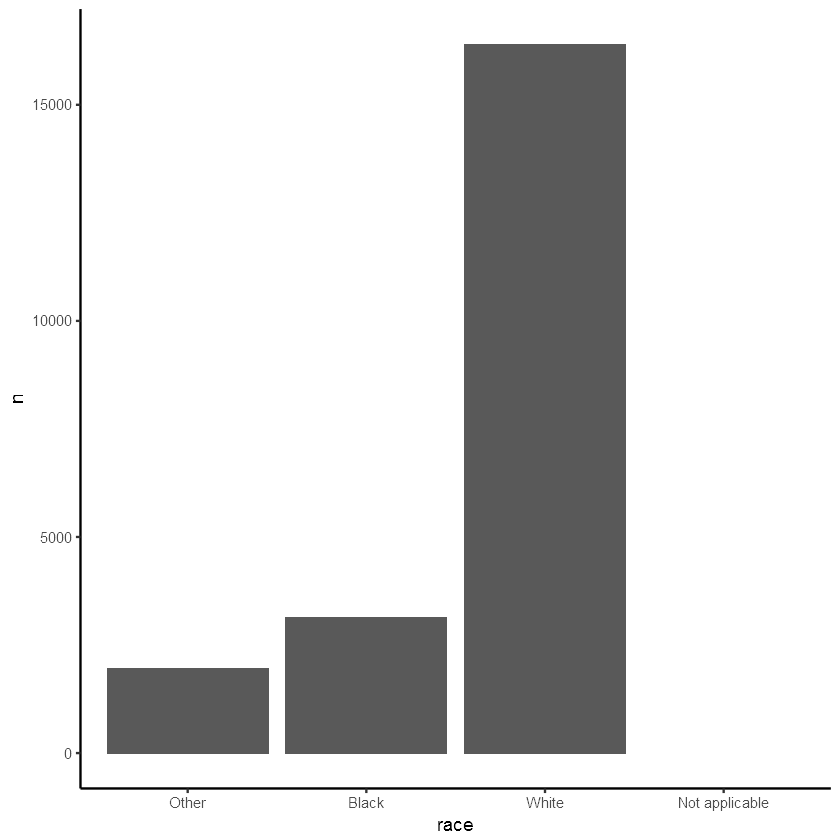

In [25]:
gss_cat %>%
    count (race) %>%
    ggplot() + 
    geom_bar (aes(race, n), stat="identity") + 
    scale_x_discrete(drop=FALSE) + 
    theme_classic()

### Modify Factor Order

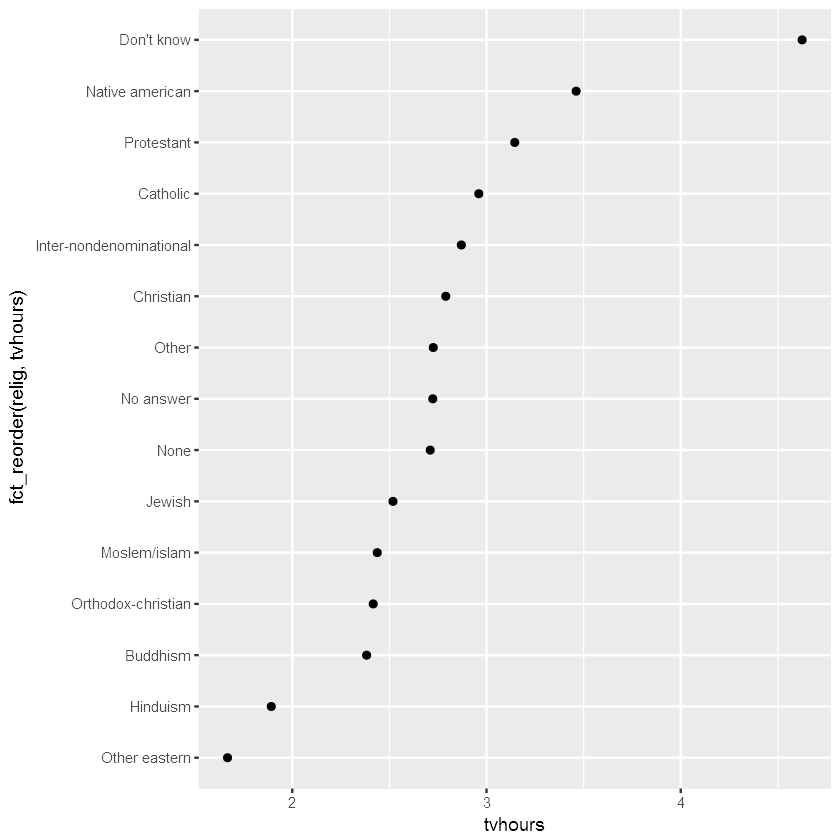

In [31]:
## 値で順番を持たせたい場合
relig <- gss_cat %>%
    group_by (relig) %>%
    summarise (
        age = mean (age, na.rm=TRUE), 
        tvhours = mean (tvhours, na.rm=TRUE), 
        n = n()
    )
ggplot(relig, aes(tvhours, fct_reorder(relig, tvhours))) + 
    geom_point()

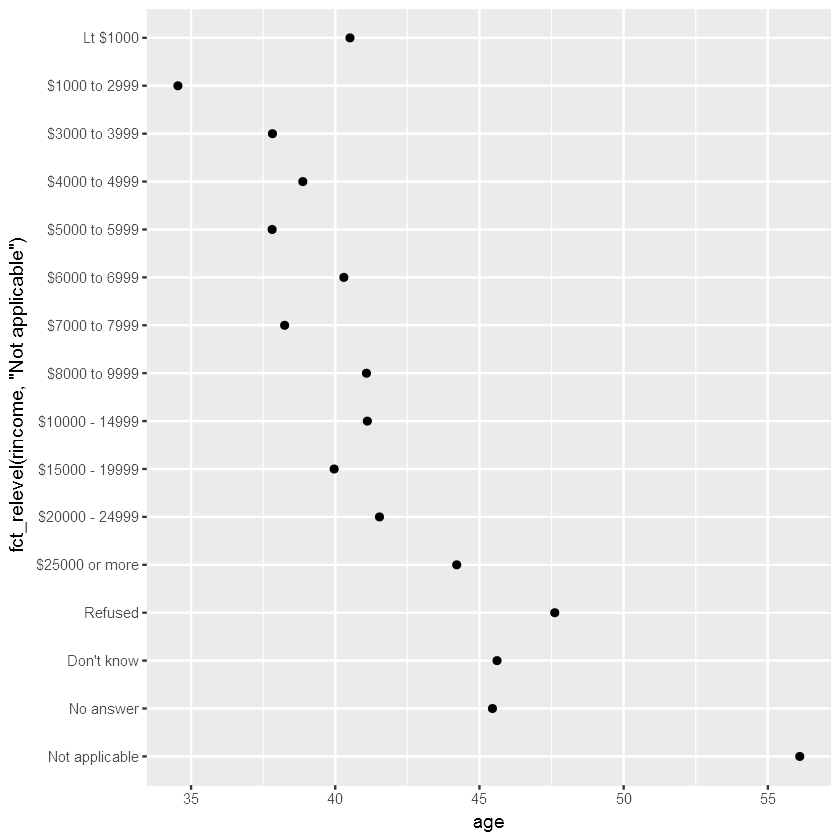

In [36]:
## もともとの値にある順番を採用したい場合
rincome <- gss_cat %>%
    group_by (rincome) %>%
    summarise (
        age = mean(age, na.rm=TRUE), 
        tvhours = mean(tvhours, na.rm=TRUE, 
        n = n())
    )
ggplot( rincome, 
        aes (age, fct_relevel(rincome, "Not applicable"))  # Not...を一番最初にする
)  + 
    geom_point()

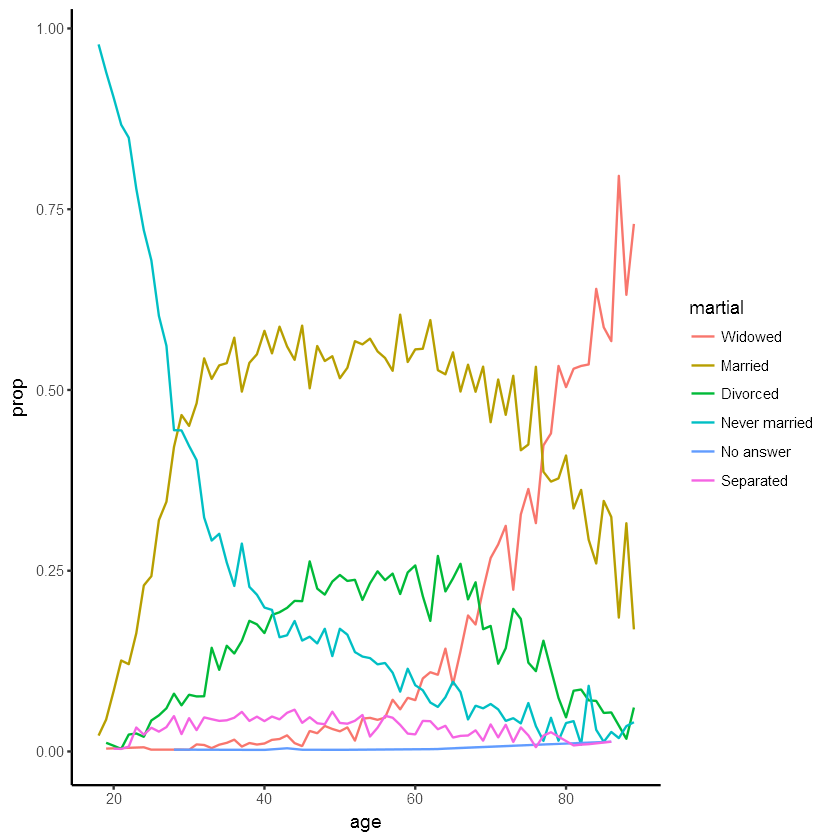

In [54]:
## reorder2でやる
## 凡例に合わせて値が上がっているのがわかる
## 第一引数がもっと大きい箇所における, 第二引数の順番で決まる
by_age <- gss_cat %>%
    filter (!is.na (age)) %>%
    group_by (age, marital) %>%
    count() %>%
    mutate (prop = n / sum(n)) %>%
    ungroup()

ggplot(
    by_age, 
    aes(age, prop, color=fct_reorder2(marital, age, prop))
) + 
    geom_line() + 
    labs(color="martial") + 
    theme_classic()

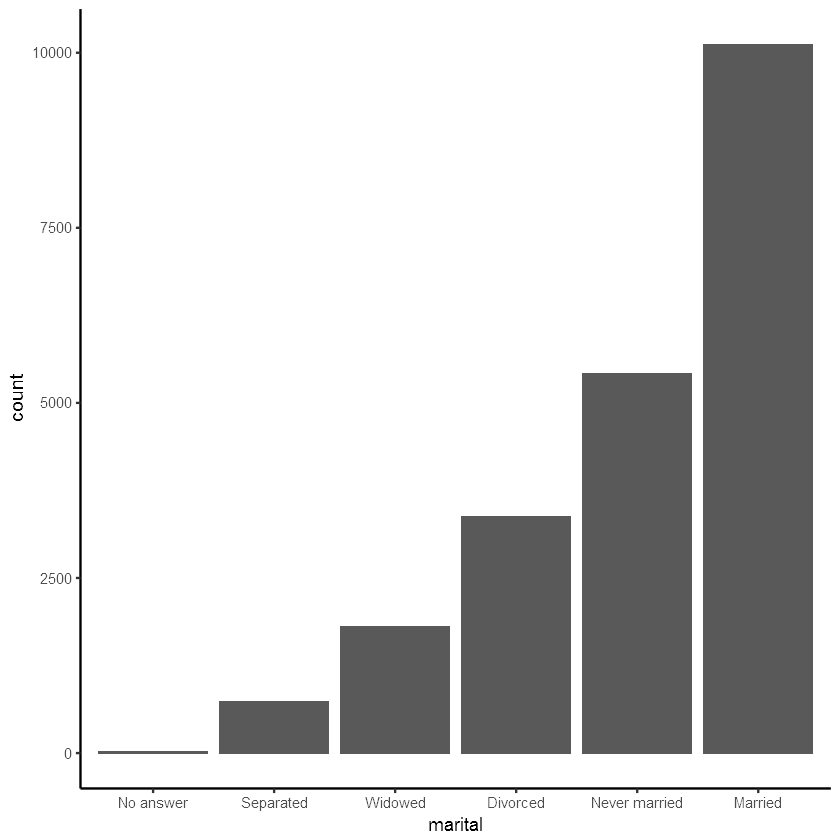

In [62]:
## 棒グラフで大きい順に並べたい場合
## fct_infreqを使う. 小さい順にするにはfct_revを利用する
gss_cat %>%
    mutate(
        marital = marital %>% fct_infreq() %>% fct_rev()
    ) %>%
    ggplot(aes(marital)) + 
    geom_bar ()  +
    theme_classic()

### Modifying Factor Levels

- fct_recode
- fct_collapse



In [63]:
gss_cat %>% count(partyid)

partyid,n
No answer,154
Don't know,1
Other party,393
Strong republican,2314
Not str republican,3032
"Ind,near rep",1791
Independent,4119
"Ind,near dem",2499
Not str democrat,3690
Strong democrat,3490


In [76]:
gss_cat %>%
    mutate (partyid = fct_recode (partyid, 
            "Republican, strong"    = "Strong republican", 
            "Republican, weak"      = "Not str republican", 
            "Independent, near rep" = "Ind,near rep", 
            "Independent, near dem" = "Ind,near dem", 
            "Democrat, weak"        = "Not str democrat", 
            "Democrat, strong"      = "Strong democrat"
        )
    ) %>%
    count(partyid) %>%
    print()

# A tibble: 10 x 2
                 partyid     n
                  <fctr> <int>
 1             No answer   154
 2            Don't know     1
 3           Other party   393
 4    Republican, strong  2314
 5      Republican, weak  3032
 6 Independent, near rep  1791
 7           Independent  4119
 8 Independent, near dem  2499
 9        Democrat, weak  3690
10      Democrat, strong  3490


In [78]:
## それ以外,...みたいな表現をしたい場合に有効
gss_cat %>%
    mutate (partyid=fct_collapse(partyid, 
        other = c ("No answer", "Dont't know", "Other party"), 
        rep   = c ("Strong republican", "Not str republican"), 
        ind   = c ("Ind,near rep", "Independent", "Ind,near dem"), 
        dem   = c ("Not str democrat", "Strong democrat")
    )) %>%
    count (partyid) %>%
    print (n = Inf)




Warning message:
"Unknown levels in `f`: Dont't know"

# A tibble: 5 x 2
     partyid     n
      <fctr> <int>
1      other   547
2 Don't know     1
3        rep  5346
4        ind  8409
5        dem  7180
